In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit
import emcee
import corner

In [4]:
fdg = np.loadtxt('/home/mabitbol/GBT-S140/externaldata/fd_G107_wim.dat')

In [5]:
cfs = fdg[:, 0] * 1.e9
mask = cfs < 4.e12
cfs = cfs[mask]
cjys = fdg[:, 1][mask]
cerrs = fdg[:, 2][mask]
cfit = fdg[:, 3][mask]
crem = fdg[:, 4][mask]
cremerr = fdg[:, 5][mask]

In [6]:
freqs = np.logspace(8, 13, 2000)
nu = freqs*1.e-9

In [7]:
beam = pi*(1.*pi/180.)**2
beam2 = pi*((0.16/60.)*pi/180.)**2

In [8]:
nfreqs = np.array([4.575, 5.625, 6.125]) * 1.e9
newdata = array([ 34.6409529 ,  35.52669743,  37.08009918])
nerrs = array([  3.26944493,   1.54816221,   4.5250867 ])

In [9]:
bigfs = np.concatenate([cfs, nfreqs])
bigdata = np.concatenate([cjys, newdata])
bigerrs = np.concatenate([cerrs, newdata*0.1])

In [10]:
def signal(freqs, EM, Asd, nup, Ad, Bd, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup, nu0=22.8e9) 
    ccmb = fg.cmb(freqs, A=Acmb)
    return (fffit + dustfit + amefit + ccmb) * beam

In [11]:
def signal_b(freqs, EM, Asd, nup, Ad, Bd, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup, nu0=22.8e9) 
    ccmb = fg.cmb(freqs, A=Acmb)
    return fffit*beam, dustfit*beam, amefit*beam, ccmb*beam

In [12]:
def signal2(freqs, EM1, EM2, Ad, Bd, abeam):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000.) * abeam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96) * beam
    return fffit + fffit2 + dustfit

In [13]:
def signal2_b(freqs, EM1, EM2, Ad, Bd, abeam):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000.) * abeam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96) * beam
    return fffit, fffit2, dustfit

In [14]:
pn = np.array([200., 1.e-3, 20.e9, 80.e-5, 2., 30.e-6])
x = curve_fit(signal, cfs, cjys, p0=pn, sigma=cerrs, absolute_sigma=True)
pfit = x[0]

In [15]:
pn2 = np.array([145. , 1.e7, 50.e-5, 2., beam2])
y = curve_fit(signal2, cfs, cjys, p0=pn2, sigma=cerrs, absolute_sigma=True)
pfit2 = y[0]

In [33]:
pn = np.array([200., 1.e-3, 20.e9, 80.e-5, 2., 30.e-6])
x = curve_fit(signal, bigfs, bigdata, p0=pn, sigma=bigerrs, absolute_sigma=True)
pfit3 = x[0]
cfit3 = x[1]

In [34]:
pn2 = np.array([145. , 1.e7, 50.e-5, 2., beam2])
y = curve_fit(signal2, bigfs, bigdata, p0=pn2, sigma=bigerrs, absolute_sigma=True)
pfit4 = y[0]
cfit4 = y[1]

In [35]:
rchisq1 = np.sum( ( cjys - signal(cfs, *pfit))**2 / cerrs**2 ) / (len(cjys) - 6.)
rchisq3 = np.sum( ( bigdata - signal(bigfs, *pfit3))**2 / bigerrs**2 ) / (len(bigdata) - 6.)

In [36]:
rchisq2 = np.sum( ( cjys - signal2(cfs, *pfit2))**2 / cerrs**2 ) / (len(cjys) - 5.)
rchisq4 = np.sum( ( bigdata - signal2(bigfs, *pfit4))**2 / bigerrs**2 ) / (len(bigdata) - 5.)

In [37]:
print rchisq1, rchisq3

0.140407887637 0.861743746641


In [38]:
print rchisq2, rchisq4

0.14008148919 0.126219807838


In [39]:
print "EM, Asd, nup, Ad, Bd, Acmb"
print pfit
print pfit3

EM, Asd, nup, Ad, Bd, Acmb
[  1.96870275e+02   1.18220945e-03   3.04404465e+10   7.46421894e-04
   2.01132121e+00   8.50696668e-05]
[  3.74889774e+02   5.97200576e-04   2.90082688e+10   7.72203946e-04
   1.98489237e+00   1.90472146e-05]


In [40]:
print "EM1, EM2, Ad, Bd, abeam"
print pfit2
print pfit4

EM1, EM2, Ad, Bd, abeam
[  1.65814339e+02   2.26024545e+07   7.54986599e-04   2.00367939e+00
   1.37349408e-08]
[  1.68921885e+02   4.41821755e+07   7.54463261e-04   2.00417328e+00
   6.92576739e-09]


In [41]:
np.sqrt(pfit2[-1] / pi) * 180. / pi * 60.

0.22730675511366805

In [42]:
np.sqrt(pfit4[-1] / pi) * 180. / pi * 60.

0.16141091409081532

In [43]:
print "EM, Asd, nup, Ad, Bd, Acmb"
print pfit3
print np.sqrt(np.diag(cfit3))

EM, Asd, nup, Ad, Bd, Acmb
[  3.74889774e+02   5.97200576e-04   2.90082688e+10   7.72203946e-04
   1.98489237e+00   1.90472146e-05]
[  2.18693645e+01   3.18360776e-04   6.53725236e+09   1.18810900e-04
   1.20940855e-01   4.18904262e-05]


In [45]:
print "EM1, EM2, Ad, Bd, abeam"
print pfit4
print np.sqrt(np.diag(cfit4))

EM1, EM2, Ad, Bd, abeam
[  1.68921885e+02   4.41821755e+07   7.54463261e-04   2.00417328e+00
   6.92576739e-09]
[  5.62556443e+01   2.68368448e+07   1.06483216e-04   1.09419211e-01
   4.40371127e-09]


In [48]:
np.sqrt(np.sqrt(np.diag(cfit4)[-1]) / pi) * 180. / pi * 60.

0.12870883665202812

In [10]:
def signal(freqs, EM, Asd, nup, Ad, Bd, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup, nu0=22.8e9) 
    ccmb = fg.cmb(freqs, A=Acmb)
    return (fffit + dustfit + amefit + ccmb) * beam

In [14]:
pn = np.array([200., 1.e-3, 20.e9, 80.e-5, 2., 30.e-6])
x = curve_fit(signal, cfs, cjys, p0=pn, sigma=cerrs, absolute_sigma=True)
pfit = x[0]

In [43]:
print "EM, Asd, nup, Ad, Bd, Acmb"
print pfit3
print np.sqrt(np.diag(cfit3))

EM, Asd, nup, Ad, Bd, Acmb
[  3.74889774e+02   5.97200576e-04   2.90082688e+10   7.72203946e-04
   1.98489237e+00   1.90472146e-05]
[  2.18693645e+01   3.18360776e-04   6.53725236e+09   1.18810900e-04
   1.20940855e-01   4.18904262e-05]


In [26]:
ff0, dust0, ame0, cmb0 = signal_b(freqs, *pfit3)
ff1, ff2, dust2 = signal2_b(freqs, *pfit4)

In [27]:
ff0a, dust0a, ame0a, cmb0a = signal_b(freqs, *pfit)
ff1a, ff2a, dust2a = signal2_b(freqs, *pfit2)

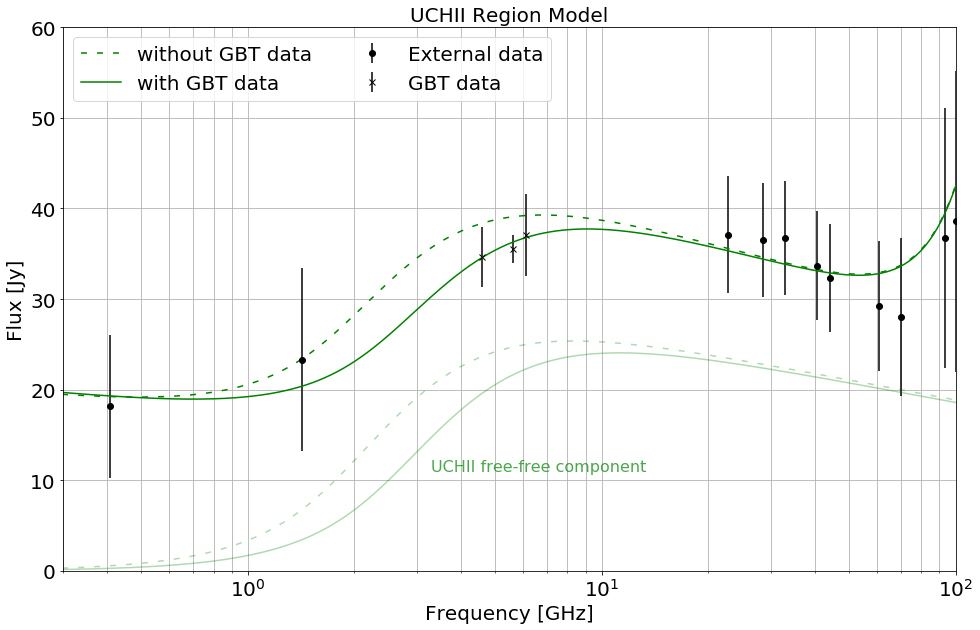

In [29]:
figure(figsize=(16,10))
plot(nu, signal2(freqs, *pfit2), 'green', ls='dashed', dashes=(3,5), label='without GBT data')
plot(nu, signal2(freqs, *pfit4), 'green', label='with GBT data')
errorbar(cfs*1.e-9, cjys, yerr=cerrs, fmt='ko', label='External data')
errorbar(nfreqs*1.e-9, newdata, yerr=nerrs, fmt='kx', label='GBT data')

alpha = 0.3
#plot(nu, ff1, 'green', alpha=alpha)
plot(nu, ff2, 'green', alpha=alpha)

#plot(nu, ff1a, 'green', alpha=alpha, ls='dashed', dashes=(3,5))
plot(nu, ff2a, 'green', alpha=alpha, ls='dashed', dashes=(3,5))

xscale('log')
ylim(0, 60)
xlim(0.3, 100)
xlabel('Frequency [GHz]', fontsize=20)
ylabel('Flux [Jy]', fontsize=20)
legend(loc=2, ncol=2, fontsize=20)
grid()
grid(which='minor')
xticks(fontsize=20)
yticks(fontsize=20)
text(3.3, 11, 'UCHII free-free component', fontsize=16, color='green', alpha=0.7)
title('UCHII Region Model', fontsize=20)
#savefig('../notebooks/freefreefit.pdf', format='pdf')

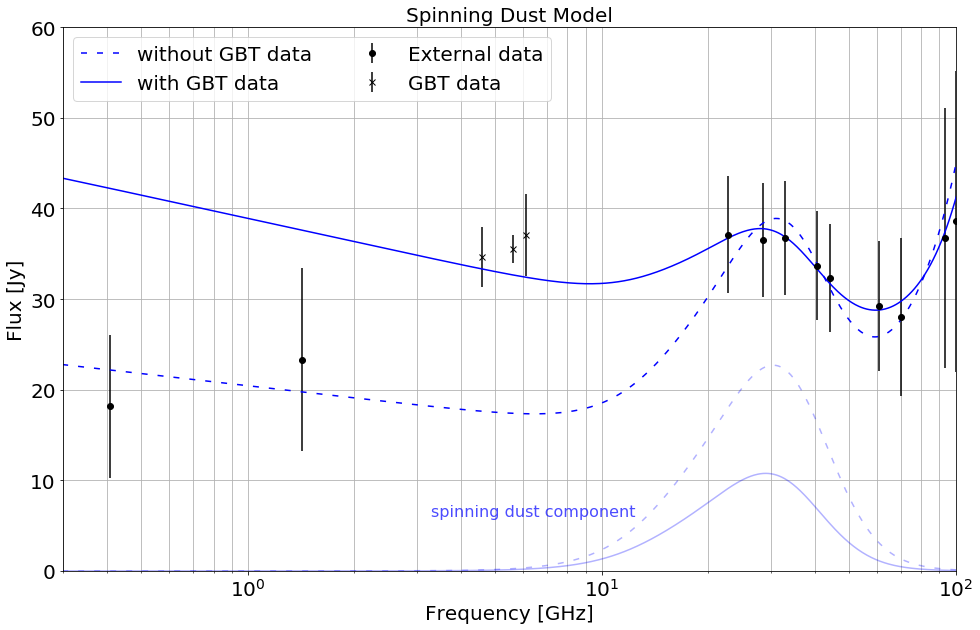

In [30]:
figure(figsize=(16,10))
plot(nu, signal(freqs, *pfit), 'blue', ls='dashed', dashes=(3,5), label='without GBT data')
plot(nu, signal(freqs, *pfit3), 'blue', label='with GBT data')
errorbar(cfs*1.e-9, cjys, yerr=cerrs, fmt='ko', label='External data')
errorbar(nfreqs*1.e-9, newdata, yerr=nerrs, fmt='kx', label='GBT data')

alpha = 0.3
#plot(nu, ff0, 'blue', alpha=alpha)
plot(nu, ame0, 'blue', alpha=alpha)
#plot(nu, cmb0, 'blue', alpha=alpha)

#plot(nu, ff0a, 'blue', alpha=alpha, ls='dashed', dashes=(3,5))
plot(nu, ame0a, 'blue', alpha=alpha, ls='dashed', dashes=(3,5))
#plot(nu, cmb0a, 'blue', alpha=alpha, ls='dashed', dashes=(3,5))

xscale('log')
ylim(0, 60)
xlim(0.3, 100)
xlabel('Frequency [GHz]', fontsize=20)
ylabel('Flux [Jy]', fontsize=20)
legend(loc=2, ncol=2, fontsize=20)
grid()
grid(which='minor')
xticks(fontsize=20)
yticks(fontsize=20)
title('Spinning Dust Model', fontsize=20)
text(3.3, 6, 'spinning dust component', fontsize=16, color='blue', alpha=0.7)
#savefig('../notebooks/spinningdustfit.pdf', format='pdf')

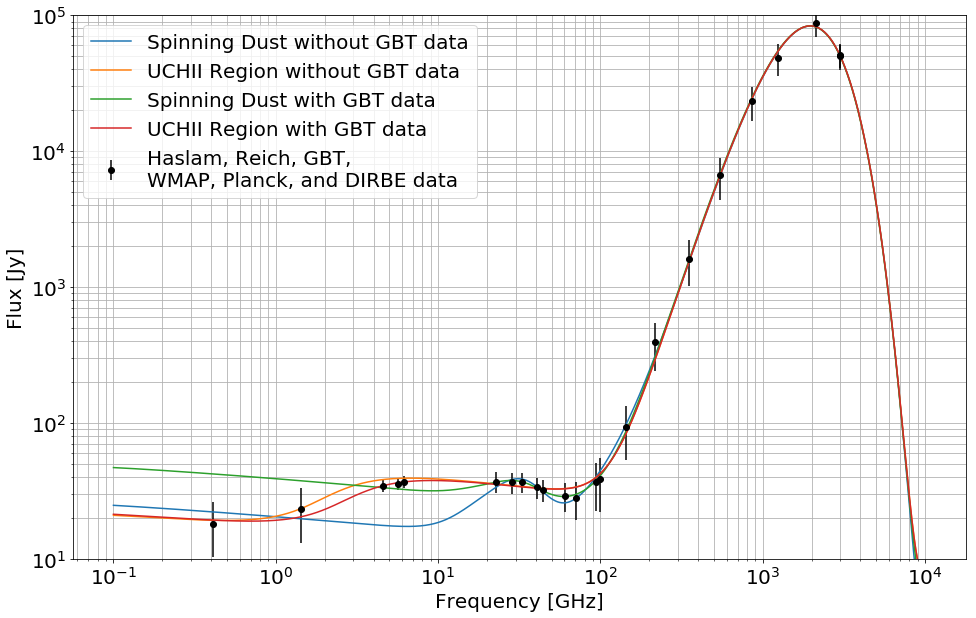

In [31]:
figure(figsize=(16,10))
plot(nu, signal(freqs, *pfit), label='Spinning Dust without GBT data')
plot(nu, signal2(freqs, *pfit2), label='UCHII Region without GBT data')
plot(nu, signal(freqs, *pfit3), label='Spinning Dust with GBT data')
plot(nu, signal2(freqs, *pfit4), label='UCHII Region with GBT data')
errorbar(bigfs*1.e-9, bigdata, yerr=bigerrs, fmt='ko', label='Haslam, Reich, GBT,\nWMAP, Planck, and DIRBE data')

xscale('log')
yscale('log')
xlabel('Frequency [GHz]', fontsize=20)
ylabel('Flux [Jy]', fontsize=20)
legend(loc=2, ncol=1, fontsize=20)
grid()
ylim(10, 1e5)
grid(which='minor')
xticks(fontsize=20);
yticks(fontsize=20);
#savefig('../notebooks/fullspectrum.pdf', format='pdf')

In [148]:
def lnprior2(theta):
    EM1, EM2, Ad, Bd, abeam = theta
    if EM1 < 0 or EM2 < 0 or Ad < 0 or Bd < 0 or abeam < 0:
        return np.inf
    return 0.

In [149]:
def lnprob2(theta, x, y, yerr):
    lp = lnprior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike2(theta, x, y, yerr)

In [150]:
def lnlike2(theta, x, y, yerr):
    EM1, EM2, Ad, Bd, abeam = theta
    #abeam = np.sqrt(abeam / pi) * 180. / pi * 60.
    #abeam = np.log(abeam)
    #EM2 = np.log(EM2)
    fffit = fg.freefreep(x, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(x, EM=EM2, Te=8000.) * abeam
    dustfit = fg.thermal_dust(x, Ad=Ad, Bd=Bd, Td=18.96) * beam
    model = fffit + fffit2 + dustfit
    return -0.5 * (np.sum((y-model)**2. * yerr**-2.))

In [156]:
ndim, nwalkers = 5, 64
pos = [pfit4 * (1. + 1.e-3*np.random.randn(ndim)) for i in range(nwalkers)]

In [157]:
sampler1 = emcee.EnsembleSampler(nwalkers, ndim, lnprob2, args=(bigfs, bigdata, bigerrs), threads=16)

In [158]:
sampler1.run_mcmc(pos, 1024);

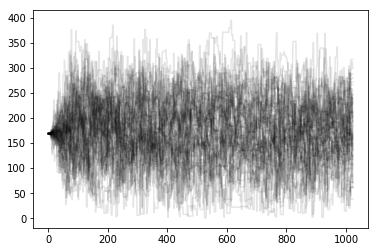

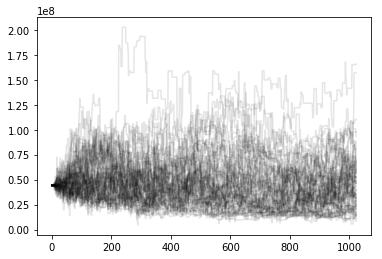

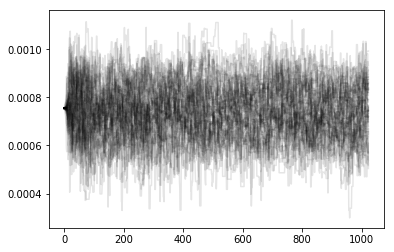

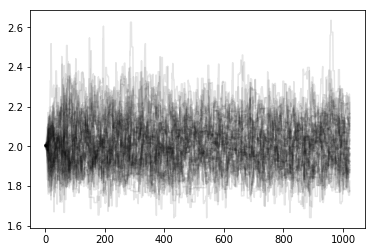

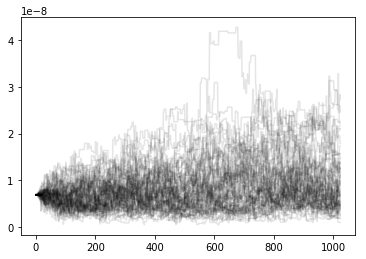

In [159]:
for k in range(ndim):
    figure()
    plot(sampler1.chain[:,:,k].T, color='k', alpha=0.1);

In [160]:
samples1 = sampler1.chain[:, 200:, :].reshape((-1, ndim))

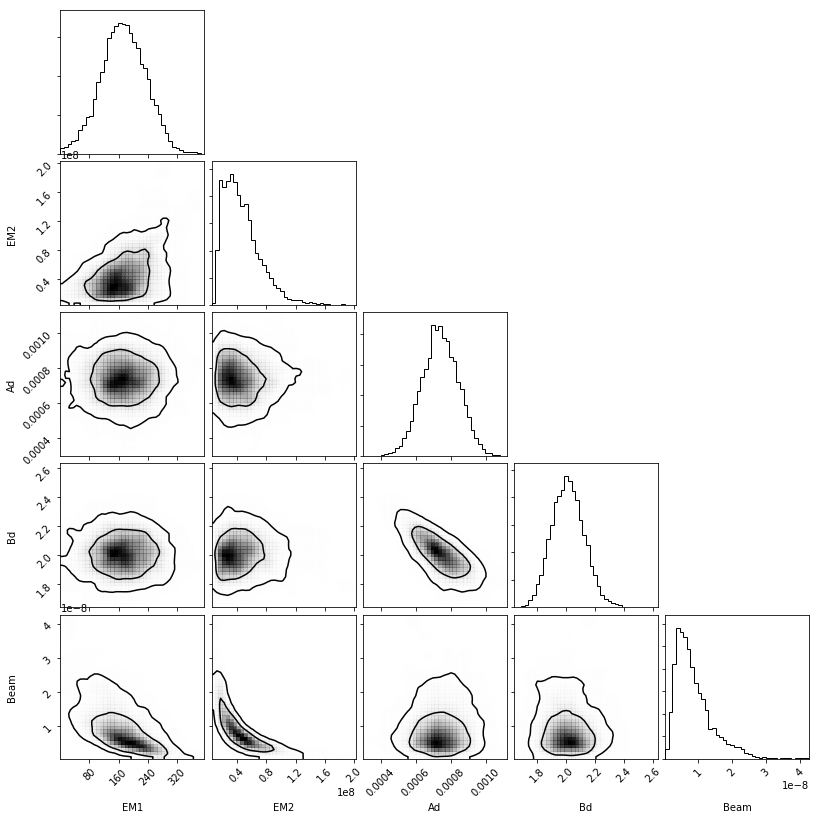

In [161]:
fig = corner.corner(samples1, plot_datapoints=False, bins=40, levels=[0.68,0.95], smooth=1.,\
                    labels=["EM1", "EM2", "Ad", "Bd", "Beam"])

In [82]:
def lnprior(theta):
    EM, Asd, nup, Ad, Bd, Acmb = theta
    if Asd < 0 or nup < 0 or Ad < 0 or Bd < 0 or EM < 0:
        return np.inf
    return 0.

In [83]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [84]:
def lnlike(theta, x, y, yerr):
    EM, Asd, nup, Ad, Bd, Acmb = theta
    fffit = fg.freefreep(x, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(x, Ad=Ad, Bd=Bd, Td=18.96)
    amefit = fg.ame(x, Asd=Asd, nup=nup, nu0=22.8e9) 
    ccmb = fg.cmb(x, A=Acmb)
    model = (fffit + dustfit + amefit + ccmb) * beam
    return -0.5 * (np.sum((y - model)**2. * yerr**-2.))

In [85]:
ndim, nwalkers = 6, 64
pos = [pfit3 * (1. + 1.e-3*np.random.randn(ndim)) for i in range(nwalkers)]

In [86]:
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(bigfs, bigdata, bigerrs), threads=32)

In [87]:
sampler2.run_mcmc(pos, 1024);

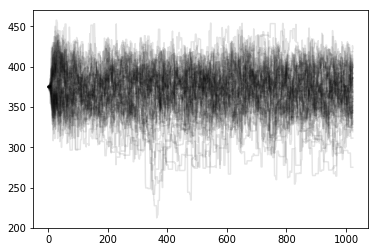

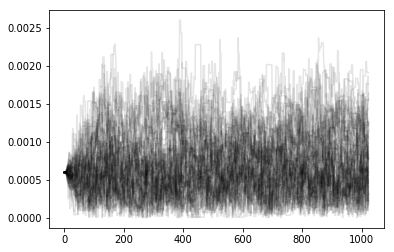

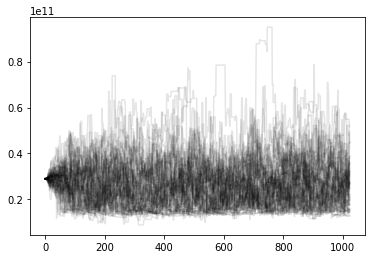

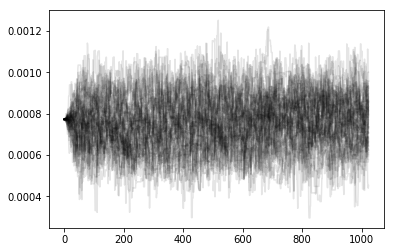

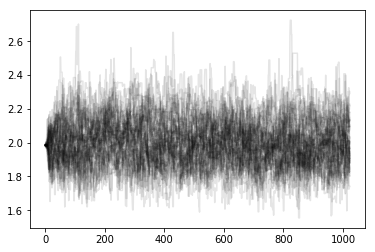

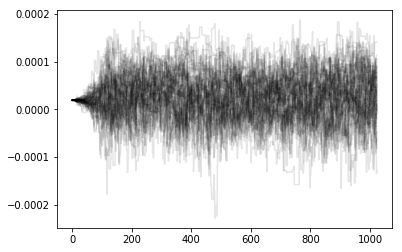

In [88]:
for k in range(ndim):
    figure()
    plot(sampler2.chain[:,:,k].T, color='k', alpha=0.1);

In [89]:
samples2 = sampler2.chain[:, 200:, :].reshape((-1, ndim))

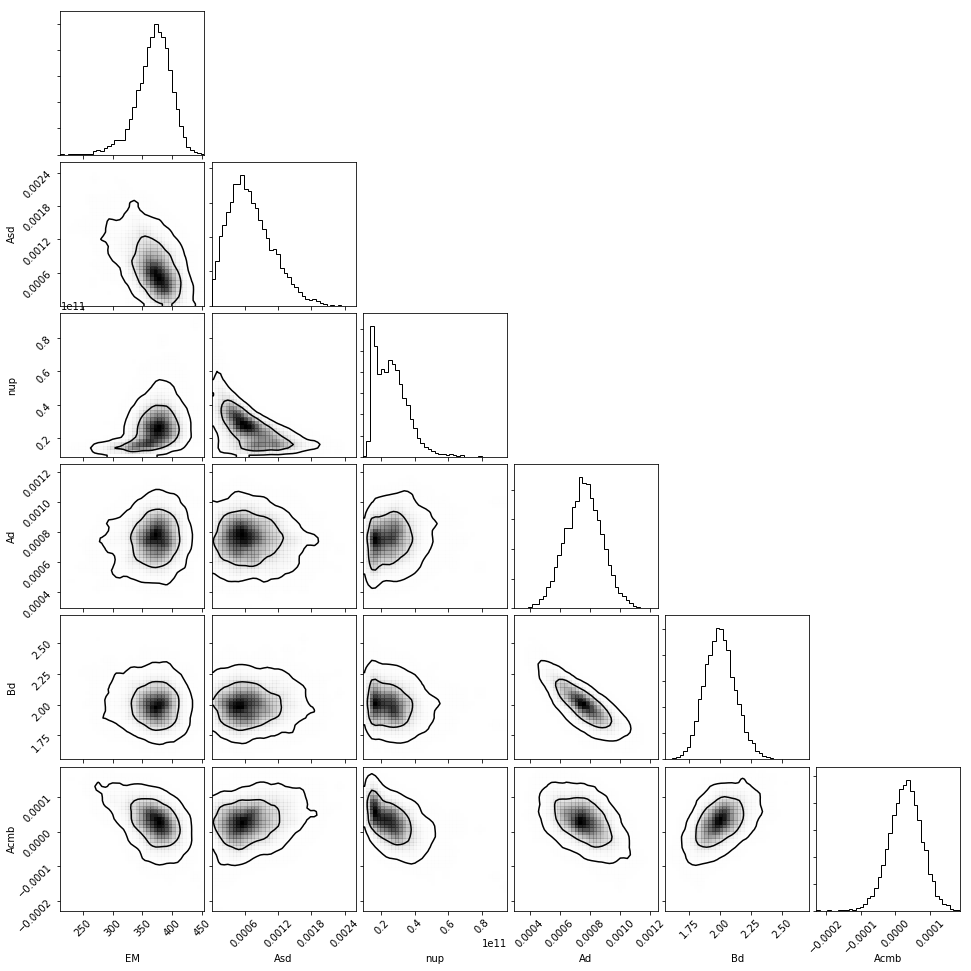

In [90]:
fig = corner.corner(samples2, plot_datapoints=False, bins=40, levels=[0.68,0.95], smooth=1.,\
                    labels=["EM", "Asd", "nup", "Ad", "Bd", "Acmb"])

In [42]:
prob1 = 0
for k in range(len(samples1)):
    prob1 += np.exp(lnlike2(samples1[k], bigfs, bigdata, bigerrs))

In [45]:
prob2 = 0
for k in range(len(samples2)):
    prob2 += np.exp(lnlike(samples2[k], bigfs, bigdata, bigerrs))

In [46]:
prob1

0.00085024034696440322

In [47]:
prob2

6.2092646584479706e-06

In [56]:
from scipy import integrate

In [57]:
def integrand(a, b, c, d, xarr=bigfs, data=bigdata, dataerrs=bigerrs):
    return np.exp(lnlike2([a, b, c, d], xarr, data, dataerrs))

In [58]:
plims = zip(samples1.min(0), samples1.max(0))

In [112]:
integrate.nquad(integrand, plims)

/usr/lib64/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


KeyboardInterrupt: 

In [59]:
def integrand2(a, b, c, d, e, xarr=bigfs, data=bigdata, dataerrs=bigerrs):
    return np.exp(lnlike([a, b, c, d, e], xarr, data, dataerrs))

In [60]:
plims2 = zip(samples2.min(0), samples2.max(0))

In [ ]:
integrate.nquad(integrand2, plims2)

In [100]:
bic1 = np.log(len(bigdata)) * 6. - 2. * sampler2.lnprobability[:, 200:].reshape((-1, len(samples2))).max()

In [101]:
bic1

62.014795500448017

In [102]:
bic2 = np.log(len(bigdata)) * 4. - 2. * sampler1.lnprobability[:, 200:].reshape((-1, len(samples1))).max()

In [103]:
bic2

45.855406252521412